# Jeff Sternberg, Research Methods, Alex Alden, Spring 2020



## Using the NYTimes Article API to Create a Corpus on the Coverage of Global Warming: 
## An introduction to APIs, JSON, Data Types, and Digital Research Methods

Using the *New York Times* API, we will explore the coverage of Global Warming from 2010 to the present, showing you how to use the API to start a query, then show you how we go from unstructrued to structured data, providing examples of what we can do and say with this data. Some of these examples include graphing the number of Global Warming related article counts by year and tracking and ploting the frequency of key words used to frame and tag each of these articles. 

We will finish by showing you how to take the text from each article and save it as a .txt file to use in further text analysis with Lexos.

### Importing Libraries to Handle APIs

In [1]:
# Import required libraries
from __future__ import division
import requests
import json
import math
import matplotlib.pyplot as plt
import time
import pandas
import csv
import seaborn as sns
%matplotlib inline

## Searching for Stories about Global Warming

Here we have our code for making our global warming search query through the New York Times API, all the information that could have gone into a web browser url bar, parsed out so we can see what's happening, what we're asking from the api, and how that is converted in a url for the request.  

In [2]:
# Here we set our developer key to gain access to the api
key = "K0SXhLyvtz0sMOhVP911dj2KUFV4XDxt"

# Here we set the base url to the NYTimes Article Search API, adding .json to specify we want it to return the results 
#in json format
base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

#Here we set the range for years of articles we want to look at
year_range = range(2010, 2020)

#create empty list varible
year_tuple = list()
data_list = list()
for year in year_range:
    print(year)

    # set search parameters
    search_params = {"q": "global warming", #this is where you enter your search term
                    "api-key": key,
                    "begin_date": str(year)+"0101",  # create year range from the element variable
                    "end_date": str(year)+"1231"}

    # make request
    r = requests.get(base_url, params=search_params)

    # wait 3 seconds for the GET request
    time.sleep(3)

    # convert to a dictionary
    data = json.loads(r.text)
    data_list.append(data)

    # get number of hits
    hits = data['response']['meta']['hits']
    print("number of hits: ", str(hits))
    year_tuple.append(tuple((year, hits)))

2010
number of hits:  1855
2011
number of hits:  1818
2012
number of hits:  1928
2013
number of hits:  1617
2014
number of hits:  1665
2015
number of hits:  1822
2016
number of hits:  1755
2017
number of hits:  1943
2018
number of hits:  2101
2019
number of hits:  2285


## Plotting the Number of Articles on Global Warming by Year
Above, we asked to see how many articles contain or reference our search term "global warming" per year. We can turn that into a table, and graph it to see quantitatively how much the New York Times has been covering Global Warming as a Topic over the past 10 years.

In [3]:
df_years = pandas.DataFrame(year_tuple, columns = ["year", "count"])
df_years

,year,count
0,2010,1855
1,2011,1818
2,2012,1928
3,2013,1617
4,2014,1665
5,2015,1822
6,2016,1755
7,2017,1943
8,2018,2101
9,2019,2285


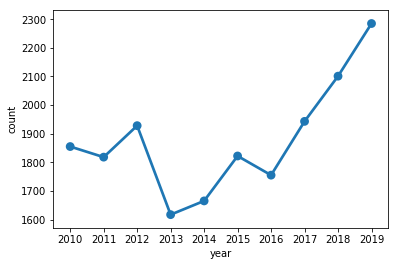

In [4]:
sns.pointplot(x='year', y='count', data = df_years)

Weve graphed coverage of global warming by number of articles related to global warming above and we can start to make some hypotheses, arguments and conclusions from this data.

It seems that Global Warming as an issue received increasign coverage from 2010 to 2012, then coverage dropped from 2012 to 2013. A research question we could ask following this finding is why? Did some event happen in this time that took focus away from global warming as an issue? Did the New York Times choose to cover it less? Did they start referring to it by different terminology? Our findings have produced new research questions.

We then see that coverage remained low and slowly picked back up from 2013 to 2015, then dropped from 2015 to 2016, then shot up even higher every year from 2016 to 2019. Why did these drops and increases in coverage happen? This is a research question, and how we start to go from APIs, to fidnings, to research questions and back again.

This is just scratching the surface of what APIs make possible and the information they give us. We start with sheer article counts, but what else does the API tell us about these articles and how can we use this information?

## What's in the Data the API gives back to Us?

For each call that we did above, we pulled the first page of queries for each year, meaning that the data we pulled has all of the data for the first ten articles in each year. We have then 100 total articles (not the full amount that was used to create the plot above) with 10 articles per year, serving as a sample to see how coverage of global warming changes from year to year. 

We could change our original query and code for the NYTimes Article API to pull every page from each year so we had the full population of articles to make our corpus.

### What is in the Data we pulled and what can we do with it?

In [5]:
#Let's look at what is in the first page of the data we scraped from the New York Times, 
#looking at the 10 most relevant articles for our opioids serarch in 2010.

data_list[0]

{'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'_id': 'nyt://article/15b7c9e7-6785-5465-a9ed-001fed6f6b18',
    'abstract': 'Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.',
    'byline': {'organization': None,
     'original': 'By Judah Cohen',
     'person': [{'firstname': 'Judah',
       'lastname': 'Cohen',
       'middlename': None,
       'organization': '',
       'qualifier': None,
       'rank': 1,
       'role': 'reported',
       'title': None}]},
    'document_type': 'article',
    'headline': {'content_kicker': None,
     'kicker': 'Op-Ed Contributor',
     'main': 'Bundle Up, It’s Global Warming',
     'name': None,
     'print_headline': 'Bundle Up, It’s Global Warming',
     'seo': None,
     'sub': None},
    'keywords': [{'major': 'N',
      'name': 'subject',
      'rank': 1,
      'value': 'Weather'},
     {'major': 'N', 'name': 

In [6]:
#We see different categories represented in this output, the data nested in hierarchical sets of categories
#What categories are in the top level of our hierarchy?

for i in data_list[0]:
    print(i)

status
copyright
response


In [7]:
#If we look into the status category, what data is stored here, what other categories are nested below this?

print(data_list[0]["status"])

OK


In [8]:
#If we look into the copyright category, what data is stored here, what other categories are nested below this?

print(data_list[0]['copyright'])

Copyright (c) 2020 The New York Times Company. All Rights Reserved.


In [9]:
#If we look into the response category, what data is stored here, what other categories are nested below this?

print(data_list[0]['response'])

{'docs': [{'abstract': 'Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.', 'web_url': 'https://www.nytimes.com/2010/12/26/opinion/26cohen.html', 'snippet': 'Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.', 'lead_paragraph': 'Lexington, Mass.', 'print_section': 'WK', 'print_page': '16', 'source': 'The New York Times', 'multimedia': [], 'headline': {'main': 'Bundle Up, It’s Global Warming', 'kicker': 'Op-Ed Contributor', 'content_kicker': None, 'print_headline': 'Bundle Up, It’s Global Warming', 'name': None, 'seo': None, 'sub': None}, 'keywords': [{'name': 'subject', 'value': 'Weather', 'rank': 1, 'major': 'N'}, {'name': 'subject', 'value': 'Global Warming', 'rank': 2, 'major': 'N'}, {'name': 'subject', 'value': 'Snow and Snowstorms', 'rank': 3, 'major': 'N'}, {'name': 'glocations', 'value': 'Siberia', 'rank': 4, 'major': 'N'}, {'name': 

In [10]:
#It looks like our response category has the meat of the data that we'd be interested in, with other subcategories
#clustered beneath it. What are the next level of categories under the response category?


for i in data_list[0]['response']:
    print(i)

docs
meta


In [11]:
#What type of data is held in the meta category? 

print(data_list[0]['response']['meta'])

{'hits': 1855, 'offset': 0, 'time': 388}


In [12]:
#What type of data is held in the docs category?

data_list[0]['response']['docs'][:2]

[{'_id': 'nyt://article/15b7c9e7-6785-5465-a9ed-001fed6f6b18',
  'abstract': 'Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.',
  'byline': {'organization': None,
   'original': 'By Judah Cohen',
   'person': [{'firstname': 'Judah',
     'lastname': 'Cohen',
     'middlename': None,
     'organization': '',
     'qualifier': None,
     'rank': 1,
     'role': 'reported',
     'title': None}]},
  'document_type': 'article',
  'headline': {'content_kicker': None,
   'kicker': 'Op-Ed Contributor',
   'main': 'Bundle Up, It’s Global Warming',
   'name': None,
   'print_headline': 'Bundle Up, It’s Global Warming',
   'seo': None,
   'sub': None},
  'keywords': [{'major': 'N',
    'name': 'subject',
    'rank': 1,
    'value': 'Weather'},
   {'major': 'N', 'name': 'subject', 'rank': 2, 'value': 'Global Warming'},
   {'major': 'N',
    'name': 'subject',
    'rank': 3,
    'value': 'Snow and Snowstorms'},
   {'major':

## Naming Our Articles

Now that we've found out where our article text and metadata is stored, how do we go about organizing and saving this information in an ordered and structured way? 

We can start by naming each of the articles for easier recall access later. We can do this by taking the last name of the author and the yer the article was published and using this as the filename to save the article as.

In [13]:
#We pull out the last name by going into the docs category of the repsonse, calling the first article in 
#our data(the [0]), going into the byline category, further into the person category, and selecting the 
#lastname category, giving us just the last name of the author of this first article.

data_list[0]['response']['docs'][0]['byline']['person'][0]['lastname']

'Cohen'

In [14]:
#We pull out the year published category in a very similar way, going into the docs category of the response, 
#calling the first article in our data(the [0]), calling the pub_date category and taking only the first 4 
#characters of the pub_date leaving us with just the 4-digit year of publication. 

data_list[0]['response']['docs'][0]['pub_date'][0:4]

'2010'

In [15]:
#The above was an exmaple of how we do this for one article. We want to automate the process so we don't have to do it
#manually for each article in our data. This code automates the process and makes a list of these article names as it
#goes through our data pulling out the info above, as well as a separate list with the years each article was published.

article_name = list()
year = list()

data_list_iter = range(len(data_list))

for d in data_list_iter:
    article_iter = range((len(data_list[d]['response']['docs'])))

    for a in article_iter:
        try:
            last_name =  str(data_list[d]['response']['docs'][a]['byline']['person'][0]['lastname'])
        except:
            last_name = 'no_last_name_'+str(d)+'_'+str(a)
            
        date = data_list[d]['response']['docs'][a]['pub_date'][0:4]
        year.append(int(date))
        name = last_name+'_'+date
        article_name.append(name)

In [16]:
#Here then we see the content of the list

article_name

['Cohen_2010',
 'no_last_name_0_1_2010',
 'Usher_2010',
 'Rudolf_2010',
 'Revkin_2010',
 'Revkin_2010',
 'Barringer_2010',
 'Revkin_2010',
 'Gillis_2010',
 'Gillis_2010',
 'no_last_name_1_0_2011',
 'None_2011',
 'None_2011',
 'no_last_name_1_3_2011',
 'Revkin_2011',
 'Revkin_2011',
 'Gillis_2011',
 'Galbraith_2011',
 'Revkin_2011',
 'Revkin_2011',
 'Revkin_2012',
 'Revkin_2012',
 'Gugliotta_2012',
 'Gillis_2012',
 'no_last_name_2_4_2012',
 'Hurdle_2012',
 'Gillis_2012',
 'Revkin_2012',
 'Garthwaite_2012',
 'Revkin_2012',
 'Revkin_2013',
 'Revkin_2013',
 'Gillis_2013',
 'Andrews_2013',
 'Gillis_2013',
 'Porter_2013',
 'Reichert_2013',
 'Wald_2013',
 'Revkin_2013',
 'Kantchev_2013',
 'Revkin_2014',
 'Gillis_2014',
 'no_last_name_4_2_2014',
 'Fountain_2014',
 'Gillis_2014',
 'Schwartz_2014',
 'Davenport_2014',
 'Chang_2014',
 'Adams_2014',
 'Olmos_2014',
 'Chan_2015',
 'Revkin_2015',
 'Bromwich_2015',
 'no_last_name_5_3_2015',
 'Gillis_2015',
 'Kennedy_2015',
 'Revkin_2015',
 'no_last_nam

In [17]:
#Let's give this list more order and present it as a table so we can start seeing which articles are in our data along
#with what year they were published. We will be adding more columns and information to this table as we go, including
#the text data we are ultimately interested in.

text_df = pandas.DataFrame(article_name, columns = ["name"])

In [18]:
text_df['year']=year

In [19]:
text_df

,name,year
0,Cohen_2010,2010
1,no_last_name_0_1_2010,2010
2,Usher_2010,2010
3,Rudolf_2010,2010
4,Revkin_2010,2010
5,Revkin_2010,2010
6,Barringer_2010,2010
7,Revkin_2010,2010
8,Gillis_2010,2010
9,Gillis_2010,2010


## What Keywords are Used to Label and Describe the Articles Present? 

So thus far, we have been able to start parsing through our json file datat to see what it holds, and have begun the process of structuring our data by article to help us progress in our research, starting to build a dataset from raw
and unstructured data.

What else can we find out about each article?

We saw above there was a keyword field that listed how the NYTimes tagged and categorzied this story for content and search. What keywords were used for each article?

In [20]:
#Here, we want to look at which keywords were used for article 1 in our data. If we just pull the keywords field
#then we get our information, though it is still kind of messy.

for i in data_list[0]['response']['docs'][0]['keywords']:
    print(i)

{'name': 'subject', 'value': 'Weather', 'rank': 1, 'major': 'N'}
{'name': 'subject', 'value': 'Global Warming', 'rank': 2, 'major': 'N'}
{'name': 'subject', 'value': 'Snow and Snowstorms', 'rank': 3, 'major': 'N'}
{'name': 'glocations', 'value': 'Siberia', 'rank': 4, 'major': 'N'}
{'name': 'organizations', 'value': 'World Meteorological Organization', 'rank': 5, 'major': 'N'}


In [21]:
#We dive deeper into this output and pull just the first keyword, telling us it's rank of use for this article.

data_list[0]['response']['docs'][0]['keywords'][0]

{'major': 'N', 'name': 'subject', 'rank': 1, 'value': 'Weather'}

In [22]:
#If we just want the keyword, to put in a column in our article table, then we pull the value field, leaving us with 
#just "Weather"

data_list[0]['response']['docs'][0]['keywords'][0]['value']

'Weather'

### What Keywords are Represented in Our 100 Articles?

We can then make a list of all the keywords used for each article, automating the process we did above, and pulling each keyword for each article in our list, as well as a count of how many keywords are used in each article.

In [23]:
kw_by_doc = list()
number_of_kw = list()

data_list_iter = range(len(data_list))

for d in data_list_iter:
    article_iter = range((len(data_list[d]['response']['docs'])))

    for a in article_iter:
        doc = data_list[d]['response']['docs'][a]
        keyw_iter = range(len(doc['keywords']))
        keywords = list()
        for k in keyw_iter:
            keywords.append(doc['keywords'][k]['value'])
            
        num_kw = len(keywords)
        number_of_kw.append(num_kw)
        kw_by_doc.append(keywords)

In [24]:
kw_by_doc[:10]

#This is our first 10 articles represented purely by the keywords used to tag each article. We can see that article 1
#is represented by the five(5) keywords: Weather, Global Warming, Snow and Snowstorms, Siberia, and World Meteorological 
#Organization

[['Weather',
  'Global Warming',
  'Snow and Snowstorms',
  'Siberia',
  'World Meteorological Organization'],
 ['Global Warming',
  'Greenhouse Gas Emissions',
  'United Nations Framework Convention on Climate Change',
  'United Nations',
  'Cancun (Mexico)',
  'Obama, Barack'],
 ['United Nations Framework Convention on Climate Change',
  'Global Warming',
  'Alternative and Renewable Energy',
  'Greenhouse Gas Emissions'],
 ['Christians and Christianity',
  'Environment',
  'Evangelical Movement',
  'Global Warming',
  'Greenhouse Gas Emissions'],
 ['Blogs and Blogging (Internet)',
  'Global Warming',
  'Ice',
  'Statistics',
  'Mann, Michael E',
  'Science (Journal)',
  'Texas A&M University',
  'University of Washington',
  'ANTARCTIC REGIONS',
  'South Pole'],
 ['Environment',
  'Forecasts',
  'Global Warming',
  'Snow and Snowstorms',
  'Weather',
  'Revkin, Andrew C',
  'Massachusetts Institute of Technology',
  'National Science Foundation',
  'Europe',
  'North America',
  'Si

In [25]:
number_of_kw[:10]

#This is taking the same first 10 articles above and representing them purely by the number of keywords used to tag 
#each article. We can see that article 1 is represented by the five (5) keywords, article 2 by 6, and so on

[5, 6, 4, 5, 10, 12, 5, 12, 5, 4]

In [26]:
#Let's add the lists of keywords used in each article, as well as the number of keywords used in each article to our
#article table

text_df['key_words']=kw_by_doc
text_df['number_of_key_words']=number_of_kw

In [27]:
text_df

,name,year,key_words,number_of_key_words
0,Cohen_2010,2010,"[Weather, Global Warming, Snow and Snowstorms,...",5
1,no_last_name_0_1_2010,2010,"[Global Warming, Greenhouse Gas Emissions, Uni...",6
2,Usher_2010,2010,[United Nations Framework Convention on Climat...,4
3,Rudolf_2010,2010,"[Christians and Christianity, Environment, Eva...",5
4,Revkin_2010,2010,"[Blogs and Blogging (Internet), Global Warming...",10
5,Revkin_2010,2010,"[Environment, Forecasts, Global Warming, Snow ...",12
6,Barringer_2010,2010,"[Massachusetts, Global Warming, Energy Efficie...",5
7,Revkin_2010,2010,"[Carbon Dioxide, Economics, Environment, Globa...",12
8,Gillis_2010,2010,"[Scripps Institution of Oceanography, Global W...",5
9,Gillis_2010,2010,"[Carbon Dioxide, Global Warming, Greenhouse Ga...",4


### What can we do with this Keyword Information?

One question we can ask is: How Many Times was Each Keyword used in Our Sample?

In [28]:
#Here, we write a command that counts the usage of each keyword across all our articles

df = pandas.Series(sum([item for item in text_df.key_words], [])).value_counts()

In [29]:
#Let's turn it into a table of keywords by their frequency of use

df_1 = df.to_frame()
df_1

,0
Global Warming,100
Greenhouse Gas Emissions,40
Environment,19
United States Politics and Government,18
Carbon Dioxide,15
"Trump, Donald J",14
Weather,12
ARCTIC REGIONS,10
United Nations Framework Convention on Climate Change,10
Oceans and Seas,10


In [30]:
#What does our distribution look like for keyword counts? It looks like there are 352 total keywords used in our 
#100 articles, that the maximum amount a keyword was used was 100 times, that our mean number of times a keyword was 
#used was 2.21 times, and that 75% of our frequency usage happens with keywords used more than 2 times.


df_1.describe()

,0
count,352.000000
mean,2.207386
std,6.032642
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,100.000000


In [31]:
#The frequency data as it stands is messy and skewed right, let's only look at keywords with high frequencies of use
#for comparisons, so only those keywords with over 2 uses, representing 75% of our data

df_for_plot = df_1[df_1[0]>2]

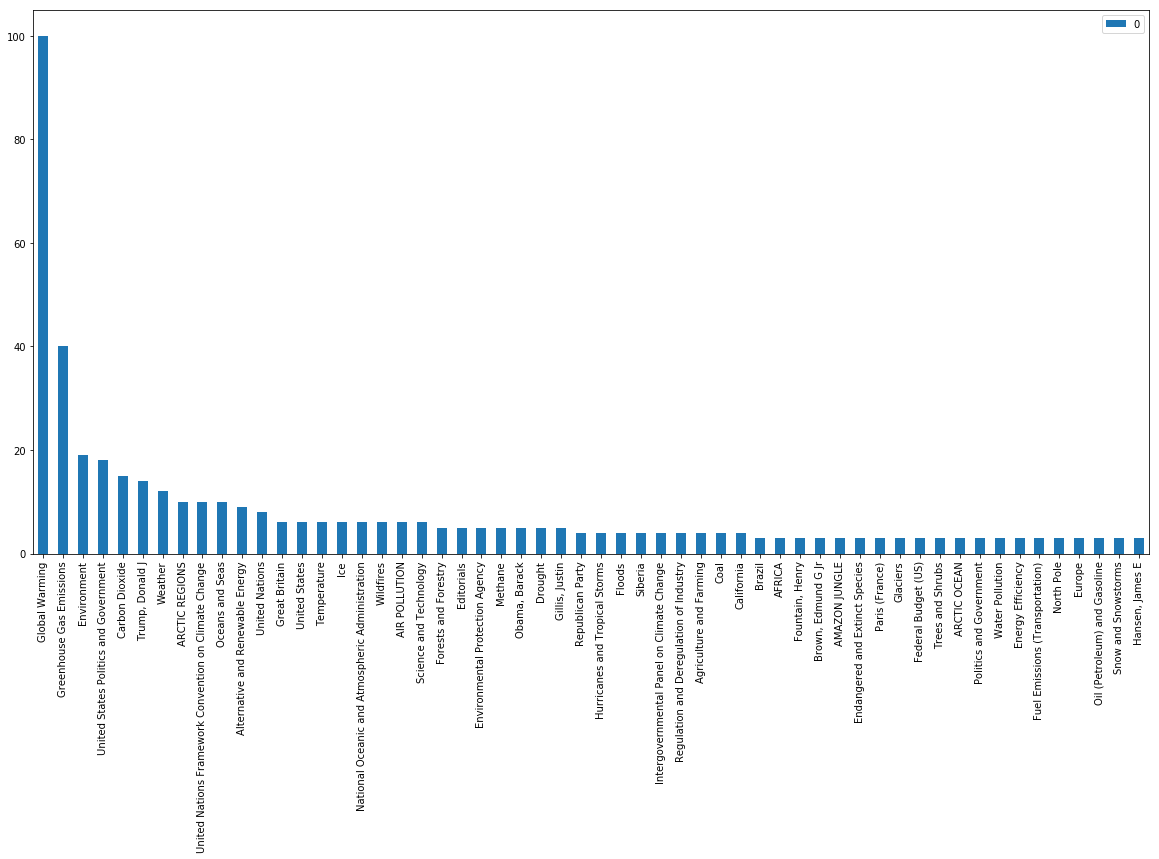

In [32]:
#Let's plot the frequencies of keyword use on a bar-graph. From this we can begin to think of how stories relating 
#to global warming are categorized, tagged, and pitched by the NYTimes.

df_for_plot.plot(kind='bar', figsize=(20,10))

From this simple frquency bar chart of keyword usage, we can start to learn a bit about how the New York Times is framing Global Warming as a topic. It makes sense that "Global warming" is it's own category and the highest used since that was our keyword search, but overall it doesn't tell us much.

If we start looking down past the global warming category, we see a host of other keywords being used when discussing global warming that begin to tell us soemthing. Greenhouse Gas Emissions, the Environment, United States Politics and Government, Carbon Dioxide, Donald J. Trump and Weather make up the next heavily used tags. This tells us that global warming as a topic is most being connected to it's more abstract causes, such as greenhouse gases and carbin dioxide, telling us what global warming is affecting, the environment and the weather, as well as actors implicated in global warming, the US Government and Policitcs and Donald Trump, which we can assume means actors tasked with dealing with global warming. 

As we go down the list of other frequently used categories, we see other causes, effects, and actors identified, but all are on large and generalized levels such as that of countries, States, types of natural disasters, and sectors of the economy contributing to global warming such as Coal, Forests and Forestry, Oil (Petroleum), etc. It is interesting that partcular polluters and contributors are not being named, like Exxon Mobile, Monsanto, and other large corporate actors creating pollution at the levels most contributing to global warming. 

This is an interesting finding and something we could look into more in the articles that reference these generic sectors of the economy to see what specific companies and actors are implicated in contributing to global warming. Though, we must be careful to limit the conclusions we draw from these findings, as they only represent our sample of 10 articles per year from 2010 to 2019.

## Gathering Text to Make a Corpus for Text Analysis

We've shown a little bit of what you can do with the meta-data included in the data we scraped from the NYTImes API for each article. You could parse around this output data for a bit and find other bits of data that would be interesting, however, when we are looking at News Paper articles, we are often most interested in the content of those articles, what are they saying?

Being that we want to conduct a text analysis of the content of these articles, we must first gather this written content and collect it in a structured form for analysis, which means finding the relevant text data and getting it ready to save as its own text file.

In [33]:
#We start to do this by looking again at the response and document fields in our data. Where is the text of 
#interest? It looks like it might be contained in the abstract, lead paragraph, and snippet. 

data_list[0]['response']['docs'][0]

{'_id': 'nyt://article/15b7c9e7-6785-5465-a9ed-001fed6f6b18',
 'abstract': 'Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.',
 'byline': {'organization': None,
  'original': 'By Judah Cohen',
  'person': [{'firstname': 'Judah',
    'lastname': 'Cohen',
    'middlename': None,
    'organization': '',
    'qualifier': None,
    'rank': 1,
    'role': 'reported',
    'title': None}]},
 'document_type': 'article',
 'headline': {'content_kicker': None,
  'kicker': 'Op-Ed Contributor',
  'main': 'Bundle Up, It’s Global Warming',
  'name': None,
  'print_headline': 'Bundle Up, It’s Global Warming',
  'seo': None,
  'sub': None},
 'keywords': [{'major': 'N', 'name': 'subject', 'rank': 1, 'value': 'Weather'},
  {'major': 'N', 'name': 'subject', 'rank': 2, 'value': 'Global Warming'},
  {'major': 'N', 'name': 'subject', 'rank': 3, 'value': 'Snow and Snowstorms'},
  {'major': 'N', 'name': 'glocations', 'rank': 4, 'value': 

In [34]:
#What text is held in the abstract?

data_list[0]['response']['docs'][0]['abstract']

'Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.'

In [35]:
#What text is held in the lead paragraph?

data_list[0]['response']['docs'][0]['lead_paragraph']

'Lexington, Mass.'

In [36]:
#What text is held in the snippet? 

data_list[0]['response']['docs'][0]['snippet']

'Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.'

A limitation of the article search API and the data we collected is that the full text of the article is not available, only a few text fields such as the abstract and snippet summarizing the article, and the lead paragraph of article itself.

In our above example, the abstract and snippet are the same, but this is not the case with every article. For our purposes, let's just collect these three fields, and put them together into one text document for each article.

In [37]:
#Let's automate the collection of these three text fields, and merge them into one text, make a list of these texts,
#and add them to our article table.

text_by_article = list()

data_list_iter = range(len(data_list))

for d in data_list_iter:
    article_iter = range((len(data_list[d]['response']['docs'])))

    for a in article_iter:
        abstract = data_list[d]['response']['docs'][a]['abstract']
        lead_paragraph = data_list[d]['response']['docs'][a]['lead_paragraph']
        snippet = data_list[d]['response']['docs'][a]['snippet']
        text = abstract+lead_paragraph+snippet
        text_by_article.append(text)
        
       

In [38]:
#Here we look at the text collected for each of the first 5 articles

text_by_article[:5]

['Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.Lexington, Mass.Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.',
 'Delegates at this year’s global warming meeting found some common ground. Given the chaos at last year’s global warming meeting in Copenhagen, delegates to this year’s sequel in Cancún, Mexico, hoped mainly to stop the bleeding. In fact, they did more than keep the battered United Nations process alive. Delegates were freed of the expectations of the conference in Copenhagen \x97 which failed to achieve its main objective: a legally binding treaty limiting emissions. And they found common ground in a few achievable steps that will increase trust among nations and could form the basis for stronger measures down the road. Delegates at this year’s global warming meeting found some common ground.',
 'Rather than wait for inte

In [39]:
#We take the text collected for each article and add it to our article table

text_df['text']=text_by_article

In [40]:
text_df

,name,year,key_words,number_of_key_words,text
0,Cohen_2010,2010,"[Weather, Global Warming, Snow and Snowstorms,...",5,Why is it so cold and snowy in Europe and the ...
1,no_last_name_0_1_2010,2010,"[Global Warming, Greenhouse Gas Emissions, Uni...",6,Delegates at this year’s global warming meetin...
2,Usher_2010,2010,[United Nations Framework Convention on Climat...,4,Rather than wait for international diplomacy t...
3,Rudolf_2010,2010,"[Christians and Christianity, Environment, Eva...",5,Some evangelists argue that Christians must re...
4,Revkin_2010,2010,"[Blogs and Blogging (Internet), Global Warming...",10,"With peer review in place of shouting matches,..."
5,Revkin_2010,2010,"[Environment, Forecasts, Global Warming, Snow ...",12,"A forecaster seeing links between warming, Sib..."
6,Barringer_2010,2010,"[Massachusetts, Global Warming, Energy Efficie...",5,The plan puts Massachusetts in the company of ...
7,Revkin_2010,2010,"[Carbon Dioxide, Economics, Environment, Globa...",12,Students reflect on a recent gathering aimed a...
8,Gillis_2010,2010,"[Scripps Institution of Oceanography, Global W...",5,"In the 1950s, Charles David Keeling began meas..."
9,Gillis_2010,2010,"[Carbon Dioxide, Global Warming, Greenhouse Ga...",4,"Despite news reports that imply the contrary, ..."


## Saving our Corpus as Text Files for Further Analysis

Now that we have the names and text for each article in one place, let's take the text data and save each article's text data as a seperate .txt file.

In [41]:
#Here we pull out only the filename and text columns from the table above.

subset = text_df[['name','text']]

In [42]:
#Here we make a list of tuples, which we can think of as a list of two elements joined, in this case the first element 
#being the article name and the second being its corresponding text.

tuples = [tuple(x) for x in subset.values]

In [43]:
tuples [:5]

#The first 5 article tuples 

[('Cohen_2010',
  'Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.Lexington, Mass.Why is it so cold and snowy in Europe and the Eastern United States? Global warming is affecting the snow cover in Siberia.'),
 ('no_last_name_0_1_2010',
  'Delegates at this year’s global warming meeting found some common ground. Given the chaos at last year’s global warming meeting in Copenhagen, delegates to this year’s sequel in Cancún, Mexico, hoped mainly to stop the bleeding. In fact, they did more than keep the battered United Nations process alive. Delegates were freed of the expectations of the conference in Copenhagen \x97 which failed to achieve its main objective: a legally binding treaty limiting emissions. And they found common ground in a few achievable steps that will increase trust among nations and could form the basis for stronger measures down the road. Delegates at this year’s global warming meeting found som

In [ ]:
#Here we move through our list of tuples, telling the computer to open a new file, take the first element filename 
#in the tuple to name it as, and then take the second element (the text) in the tuple and write it into the newly
#created file.

#This code works through the list and saves each article as a sepearte file in the folder where this jupyter notebook
#is located. This is how the corpus and text files you were sent via email and that are available on the github page
#were created.

for tup in tuples:
    f=open(str(tup[0])+".txt","w+")
    f.write(str(tup[1]))
    f.close()

Return to the Powerpoint Slides and Proceed to the Lexos and Text Analysis section of Today's Lesson.